In [283]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import operator
import re
from random import sample
from netgraph import Graph
import gravis as gv

# Load data

In [581]:
# The categories were hand-coded by Virág
series_categories = pd.read_csv("data/imdb-to-fandom-categories1.csv").rename(columns={"fandom-id":"id"})[["id","genre1"]].groupby("id").first()
#topseries = pd.read_csv("data/imdb-to-fandom.csv")

In [585]:
meta = pd.read_csv("data/meta.csv")
meta = pd.merge(meta,series_categories,"inner","id")

meta = meta.loc[meta["nodes"]>100]
meta = meta.loc[meta["genre1"] != "romance"]
meta = meta.sort_values("imdb-votes",ascending=False)

In [588]:
topseries = meta["title"].tolist()

In [518]:

# Function to check if a string is a valid name
stopwords = ["unknown","tba","tbd"]
def is_valid_name(name):
    # You can modify this function based on your criteria for valid names
    cleaned_name = re.sub(r'[^a-zA-Z]', '', name)

    if operator.contains(stopwords,cleaned_name):
        return False
    return cleaned_name.isalpha()

def clean_text(actorlist):
# Split elements by "and" and filter out invalid names
    split_names = []
    for item in actorlist:
        names = item.split(" ")[:2]
        if len(names)<2:
            pass
        else:
            name = names[0] + " "+ names[1]
            if is_valid_name(name):
                split_names.append(name)
                

    # Overwrite the original names_list with split and filtered names
    return set(split_names)
def keep_important_nodes(edge_df,attr_df):
    nodes = pd.concat([edge_df['from'], edge_df['to']]).unique()
    node_counts = []
    for node in nodes:
        # Count how many times the node appears in 'from' and 'to' columns
        count = ((edge_df['from'] == node) | (edge_df['to'] == node)).sum()
        # Append to the DataFrame
        node_counts.append(count)

    # Sort the DataFrame by node for better visualization (optional)
    nodedf = pd.DataFrame(columns=["node","count"])
    nodedf["node"] = nodes
    nodedf["count"] = node_counts
    topnodes = list(nodedf.sort_values("count",ascending=False).head(50)["node"])
    return attr_df.loc[attr_df["id"].isin(list(topnodes))]

In [519]:
actordict = {}
for id in tqdm(meta["id"]):
    #print(id)
    actorvar = meta.loc[meta["id"] == id,"actor_variable"].values[0]
    if actorvar == 'no':
        pass
    else:
        edge_data = pd.read_csv("data/{}/edges.csv".format(id))
        temp_data = pd.read_csv("data/{}/attributes.csv".format(id))
        temp_data = keep_important_nodes(edge_data,temp_data)
        actorlist = clean_text([a.lower() for a in temp_data[actorvar].dropna().to_list()])
        print(id)
        name = meta.loc[meta["id"] == id,"title"].item()
        actordict[name] = actorlist


  1%|          | 1/95 [02:25<3:47:56, 145.49s/it]

walkingdead


  2%|▏         | 2/95 [03:03<2:07:48, 82.46s/it] 

simpsons


  3%|▎         | 3/95 [03:31<1:28:08, 57.48s/it]

arrow


  4%|▍         | 4/95 [03:43<59:58, 39.54s/it]  

greysanatomy


  6%|▋         | 6/95 [04:16<40:40, 27.42s/it]

supernatural


  7%|▋         | 7/95 [06:22<1:19:47, 54.40s/it]

southpark


  8%|▊         | 8/95 [06:23<57:07, 39.39s/it]  

bones


  9%|▉         | 9/95 [06:26<41:11, 28.74s/it]

house


 11%|█         | 10/95 [06:27<29:20, 20.71s/it]

familyguy


 12%|█▏        | 11/95 [06:29<21:16, 15.20s/it]

dexter


 13%|█▎        | 12/95 [06:31<15:35, 11.28s/it]

criminalminds


 14%|█▎        | 13/95 [06:33<11:43,  8.58s/it]

avatar


 15%|█▍        | 14/95 [06:33<08:18,  6.15s/it]

prisonbreak


 16%|█▌        | 15/95 [06:35<06:19,  4.74s/it]

expanse


 17%|█▋        | 16/95 [06:35<04:38,  3.52s/it]

futurama


 18%|█▊        | 17/95 [06:36<03:32,  2.72s/it]

sonsofanarchy


 19%|█▉        | 18/95 [06:37<02:49,  2.20s/it]

lostpedia


 20%|██        | 19/95 [06:38<02:08,  1.69s/it]

thementalist


 21%|██        | 20/95 [06:39<01:50,  1.47s/it]

boardwalkempire


 22%|██▏       | 21/95 [06:39<01:25,  1.16s/it]

rickandmorty


 23%|██▎       | 22/95 [06:41<01:39,  1.36s/it]

gameofthrones


 25%|██▌       | 24/95 [06:42<01:05,  1.08it/s]

breakingbad


 27%|██▋       | 26/95 [06:43<00:51,  1.34it/s]

sopranos


 28%|██▊       | 27/95 [06:43<00:49,  1.37it/s]

gotham


 32%|███▏      | 30/95 [06:44<00:32,  2.01it/s]

bigbangtheory
friends
for-all-mankind


 35%|███▍      | 33/95 [06:45<00:20,  3.03it/s]

howtogetawaywithmurder


 36%|███▌      | 34/95 [06:45<00:23,  2.56it/s]

riverdale


 37%|███▋      | 35/95 [06:46<00:24,  2.42it/s]

bojackhorseman


 38%|███▊      | 36/95 [06:46<00:25,  2.34it/s]

orange-is-the-new-black


 39%|███▉      | 37/95 [06:47<00:31,  1.86it/s]

vampirediaries


 40%|████      | 38/95 [06:47<00:26,  2.16it/s]

seinfeld


 41%|████      | 39/95 [06:48<00:28,  1.93it/s]

americanhorrorstory


 43%|████▎     | 41/95 [06:49<00:22,  2.38it/s]

squid-game


 45%|████▌     | 43/95 [06:49<00:17,  2.97it/s]

theoffice
brooklyn99


 46%|████▋     | 44/95 [06:50<00:19,  2.57it/s]

how-i-met-your-mother


 47%|████▋     | 45/95 [06:50<00:18,  2.76it/s]

prettylittleliars


 49%|████▉     | 47/95 [06:50<00:13,  3.60it/s]

modernfamily
thewire


 52%|█████▏    | 49/95 [06:51<00:10,  4.27it/s]

downtonabbey
jackryan


 54%|█████▎    | 51/95 [06:51<00:11,  3.80it/s]

fargo
narcos


 55%|█████▍    | 52/95 [06:51<00:10,  4.20it/s]

fearthewalkingdead


 57%|█████▋    | 54/95 [06:52<00:09,  4.36it/s]

fringe
vikings


 59%|█████▉    | 56/95 [06:52<00:07,  5.11it/s]

parksandrecreation
yellowstone


 61%|██████    | 58/95 [06:53<00:06,  5.39it/s]

the-handmaids-tale
archer


 63%|██████▎   | 60/95 [06:53<00:07,  4.91it/s]

the100
sexeducation


 66%|██████▋   | 63/95 [06:53<00:04,  6.91it/s]

houseofcards
black-mirror
themandalorian


 68%|██████▊   | 65/95 [06:54<00:04,  6.94it/s]

bridgerton


 71%|███████   | 67/95 [06:54<00:04,  6.44it/s]

the-boys
heroes


 73%|███████▎  | 69/95 [06:54<00:03,  6.62it/s]

glee
westworld


 75%|███████▍  | 71/95 [06:55<00:03,  7.81it/s]

suits
mrbean


 78%|███████▊  | 74/95 [06:55<00:03,  5.88it/s]

scrubs
malcolminthemiddle


 81%|████████  | 77/95 [06:55<00:01,  9.18it/s]

strangerthings
goodtrouble


 85%|████████▌ | 81/95 [06:56<00:01, 10.37it/s]

thegoodplace
gilmoregirls


 89%|████████▉ | 85/95 [06:56<00:00, 11.31it/s]

twoandahalfmen
amazon-invincible
lucifer


 94%|█████████▎| 89/95 [06:56<00:00, 12.59it/s]

ted-lasso
gossipgirl
teen-wolf-pack
euphoria


 96%|█████████▌| 91/95 [06:57<00:00, 10.87it/s]

peaky-blinders
sense8


100%|██████████| 95/95 [06:57<00:00,  4.39s/it]

money-heist
hannibal
this-is-us-nbc
itsalwayssunny


In [593]:
topseries1 = [series for series in topseries if series in actordict.keys()][:10]


In [522]:
# Create network
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes from the first partition (keys)
B.add_nodes_from(actordict.keys(), bipartite=0)

# Add nodes from the second partition (values)
B.add_nodes_from([node for nodes in actordict.values() for node in nodes], bipartite=1)

# Add edges between the two partitions
for node, neighbors in tqdm(actordict.items()):
    B.add_edges_from((node, neighbor) for neighbor in neighbors)

100%|██████████| 83/83 [00:00<00:00, 7767.75it/s]


In [523]:
series_graph = nx.projected_graph(B,nodes = list(actordict.keys()),multigraph=True)
edge_df = nx.to_pandas_edgelist(series_graph,edge_key="actor")
#edge_df.head()
weight_edge_df = edge_df.groupby(["source","target"])["actor"].agg('count').reset_index()
weight_edge_df=weight_edge_df.rename(columns={"actor":"weight"})

# Create network

In [524]:
weighted_graph = nx.from_pandas_edgelist(weight_edge_df,edge_attr=True)
comms = nx.community.louvain_communities(weighted_graph,weight="weight",seed=42,resolution=0.7)

In [525]:
len(comms)

5

In [526]:
communities = {}
for i, comm in enumerate(comms):
    for node in comm:
        communities[node] = i
# Define colors for communities
num_communities = max(communities.values())+1
color_map = plt.cm.get_cmap('Set3', num_communities)
node_colors = [color_map(communities[node] / num_communities) for node in weighted_graph.nodes()]
nodes = weighted_graph.nodes


C:\Users\tomi\AppData\Local\Temp\ipykernel_30388\363623851.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Set3', num_communities)


In [558]:
community_positions = {
    "action": (0, 0),
    "drama": (3, -3),
    "comedy": (-3, -3),
    #"romance": (-3, -3),
    #"nan": (-2, 0)
}


In [559]:
weighted_graph.edges

EdgeView([('American Horror Story', 'Heroes'), ('American Horror Story', 'House of Cards'), ('American Horror Story', 'How I Met Your Mother'), ('American Horror Story', 'Invincible'), ('American Horror Story', 'The Good Place'), ('American Horror Story', 'The Office'), ('Heroes', 'Breaking Bad'), ('Heroes', 'Criminal Minds'), ('Heroes', 'Gotham'), ('Heroes', 'Gilmore Girls'), ('Heroes', 'Glee'), ('Heroes', 'Invincible'), ('Heroes', 'Malcolm in the Middle'), ('Heroes', 'How I Met Your Mother'), ('Heroes', 'Prison Break'), ('Heroes', 'The Mentalist'), ('Heroes', 'The Office'), ('Heroes', 'The Wire'), ('Heroes', 'Vikings'), ('House of Cards', 'Criminal Minds'), ('House of Cards', 'Fargo'), ('House of Cards', 'Fringe'), ('House of Cards', 'Gotham'), ('House of Cards', 'Invincible'), ('House of Cards', 'How to Get Away with Murder'), ('House of Cards', "Tom Clancy's Jack Ryan"), ('How I Met Your Mother', 'Dexter'), ('How I Met Your Mother', 'Friends'), ('How I Met Your Mother', 'Fargo'), (

In [560]:
meta["imdb-score"].min()

6.8

In [561]:
imdb_scores = dict(zip(meta["title"], meta["imdb-score"]-6.8))
category_dict = dict(zip(meta["title"],meta["genre1"]))
nx.set_node_attributes(weighted_graph, imdb_scores, name="imdb-score")
nx.set_node_attributes(weighted_graph,communities,name="community")
nx.set_node_attributes(weighted_graph,category_dict,name="genre")

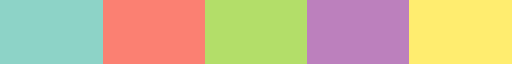

In [562]:
color_map

In [563]:
category_colors = {category: color_map(i) for i, category in enumerate(set(communities.values()))}
legend_labels = {category: plt.Line2D([0], [0], marker='o', color='w', label=category,
                                       markersize=10, markerfacecolor=color)
                 for category, color in category_colors.items()}

In [564]:
category_dict

{'The Walking Dead': 'drama',
 'The Simpsons': 'comedy',
 'The Flash': 'action',
 'Happy Valley': 'drama',
 '24': 'action',
 'Paranormal': 'drama',
 'South Park': 'comedy',
 'Bones': 'drama',
 'House': 'drama',
 'Family Guy': 'comedy',
 'Dexter': 'drama',
 'Criminal Minds': 'drama',
 'Avatar: The Last Airbender': 'action',
 'Prison Break': 'action',
 'The Expanse': 'drama',
 'Futurama': 'comedy',
 'Sons of Anarchy': 'drama',
 'Lost': 'drama',
 'The Mentalist': 'drama',
 'Boardwalk Empire': 'drama',
 'Rick and Morty': 'comedy',
 'Game of Thrones': 'action',
 'Castle': 'comedy',
 'Breaking Bad': 'drama',
 'Grimm': 'drama',
 'The Sopranos': 'drama',
 'Gotham': 'drama',
 'True Blood': 'drama',
 'Young Sheldon': 'comedy',
 'Friends': 'comedy',
 'For All Mankind': 'action',
 'Person of Interest': 'action',
 'How to Get Away with Murder': 'action',
 'Chilling Adventures of Sabrina': 'comedy',
 'BoJack Horseman': 'comedy',
 'Orange Is the New Black': 'comedy',
 'The Originals': 'drama',
 'Sein

c:\Users\tomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


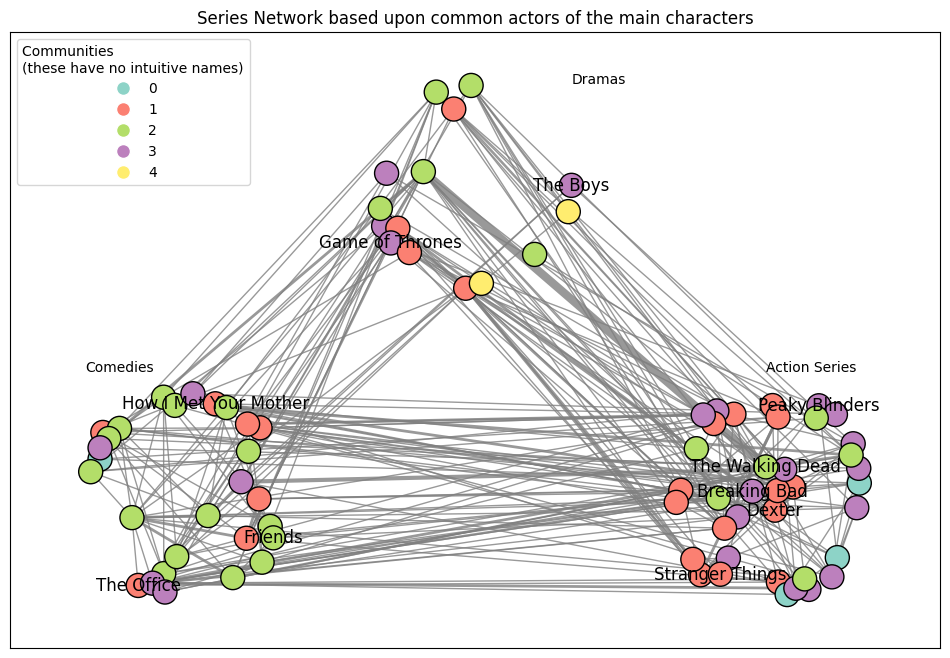

In [607]:
pos = nx.spring_layout(weighted_graph, k = 2,seed=100)
#pos = nx.circular_layout(weighted_graph,scale=0.5)
edge_weights = {(u, v): d["weight"] for u, v, d in weighted_graph.edges(data=True)}
# Plot the main graph
plt.figure(figsize=(12, 8))
#nx.draw(weighted_graph, pos, node_size=200, node_color=node_colors, cmap=color_map, edge_color='gray', with_labels=False)

# Plot nodes for each community with custom positions
for node, cat in category_dict.items():
    if (cat in community_positions) and (node in weighted_graph.nodes):
        pos[node] += community_positions[cat]
nx.draw_networkx_nodes(weighted_graph, pos, 
                       #node_size=[(imdb_scores[node])**2*100  for node in weighted_graph.nodes()],
                        node_color=node_colors, cmap=color_map, edgecolors='black')
nx.draw_networkx_labels(weighted_graph, pos,labels={node: node for node in topseries1})
nx.draw_networkx_edges(weighted_graph, pos, edge_color='gray', alpha=0.8,
                       width=[edge_weights[edge] for edge in weighted_graph.edges()])

plt.title("Series Network based upon common actors of the main characters")
plt.legend(legend_labels.values(), legend_labels.keys(), title='Communities \n(these have no intuitive names)', loc='upper left')
plt.annotate("Dramas",
             xy = (1,1),
             xytext=(1,1))
plt.annotate("Comedies",
             xy = (-4,-1.8),
             xytext=(-4,-1.8))
plt.annotate("Action Series",
             xy = (3,-1.8),
             xytext=(3,-1.8))
plt.show()

In [406]:
category_dict["yellowstone"]

'drama'

In [386]:
meta.loc[meta["genre1"] == "romance"]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,actor_variable,genre1
41,onceuponatime,375,9446,29,Once Upon a Time,7.7,235611,Once Upon a Time Wiki,tv,3K,50K,700,portrayedby,romance


In [279]:
dict_df = pd.DataFrame(list(communities.items()), columns=["id", "community"])

In [282]:
dict_df

,id,community
0,prettylittleliars,0
1,black-mirror,0
2,lucifer,0
3,downtonabbey,0
4,scrubs,0
...,...,...
76,sonsofanarchy,3
77,fearthewalkingdead,3
78,riverdale,3
79,squid-game,4


In [280]:
meta1 = pd.merge(meta, dict_df, on="id", how="left")

In [281]:
meta1.groupby("community")["imdb-score"].mean()

community
0.0    8.24375
1.0    8.60000
2.0    8.33125
3.0    8.34400
4.0    8.10000
Name: imdb-score, dtype: float64

In [422]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:red'
}
node_color = {node: community_to_color[community_id] for node, community_id in communities.items()}

Graph(weighted_graph,
      node_color=node_color, node_edge_width=0, edge_alpha=1,
      node_layout='genre', node_layout_kwargs=dict(node_to_community=communities),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()

NotImplementedError: Node layout genre not implemented. Available layouts are:
	spring
	community
	circular
	linear
	bipartite
	multipartite
	shell
	dot
	radial
	random
	geometric

In [161]:
asd = weight_edge_df["weight"]

In [162]:
import gravis as gv

In [164]:
gv.d3(weighted_graph, 
      #edge_size_data_source='weight', 
      use_edge_size_normalization=True)

In [176]:
def assign_properties(g,communities):
    # Centrality calculation
    node_centralities = nx.eigenvector_centrality(g)
    edge_centralities = nx.edge_betweenness_centrality(g)

    # Community detection
    #communities = nx.algorithms.community.greedy_modularity_communities(g)
    # Graph properties
    g.graph['node_border_size'] = 1.5
    g.graph['node_border_color'] = 'white'
    g.graph['edge_opacity'] = 0.9

    # Node properties: Size by centrality, shape by size, color by community
    colors = ['red', 'blue', 'green', 'orange', 'yellow',
              #'pink', 'brown', 'cyan', 'magenta', 'violet'
              ]
    for node_id in g.nodes:
        node = g.nodes[node_id]
        node['size'] = 10 + node_centralities[node_id] * 10
        #node['shape'] = 'rectangle' if node['size'] > 30 else 'circle'
        for community_counter, community_members in enumerate(communities):
            if node_id in community_members:
                break
        node['color'] = colors[community_counter % len(colors)]

    # Edge properties: Size by centrality, color by community (within=community color, between=black)
    for edge_id in g.edges:
        edge =  g.edges[edge_id]
        source_node = g.nodes[edge_id[0]]
        target_node = g.nodes[edge_id[1]]
        #edge['size'] = edge_centralities[edge_id] * 100
        #edge['color'] = source_node['color'] if source_node['color'] == target_node['color'] else 'black'


In [177]:
assign_properties(weighted_graph,communities)

In [178]:
gv.d3(weighted_graph, zoom_factor=1)